In [2]:
from tbparse import SummaryReader
log_dir = "/workspaces/data/MegaGen/UNet/unet_20250626-115229"
reader = SummaryReader(log_dir)
df = reader.scalars
print(df)

     step         tag     value
0       1  Dice/Train  0.132421
1       2  Dice/Train  0.493889
2       3  Dice/Train  0.582162
3       4  Dice/Train  0.618708
4       5  Dice/Train  0.645787
..    ...         ...       ...
715   116    Loss/Val -0.836730
716   117    Loss/Val -0.840624
717   118    Loss/Val -0.867696
718   119    Loss/Val -0.850191
719   120    Loss/Val -0.855836

[720 rows x 3 columns]


In [6]:
df.query("tag=='Dice/Train'").value

0      0.132421
1      0.493889
2      0.582162
3      0.618708
4      0.645787
         ...   
115    0.819026
116    0.818063
117    0.824956
118    0.825658
119    0.821706
Name: value, Length: 120, dtype: float64

In [7]:
df.tag.unique()

array(['Dice/Train', 'Dice/Val', 'IoU/Train', 'IoU/Val', 'Loss/Train',
       'Loss/Val'], dtype=object)

In [8]:
import matplotlib.pyplot as plt

def plot_history(history):
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 3, 1)
    plt.plot(epochs, history['train_loss'], label='Train Loss')
    plt.plot(epochs, history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title("Loss")

    plt.subplot(1, 3, 2)
    plt.plot(epochs, history['train_dice'], label='Train Dice')
    plt.plot(epochs, history['val_dice'], label='Val Dice')
    plt.legend()
    plt.title("Dice Coefficient")

    plt.subplot(1, 3, 3)
    plt.plot(epochs, history['train_iou'], label='Train IoU')
    plt.plot(epochs, history['val_iou'], label='Val IoU')
    plt.legend()
    plt.title("IoU")

    plt.tight_layout()
    plt.show()




ValueError: x and y must have same first dimension, but have shapes (120,) and (0,)

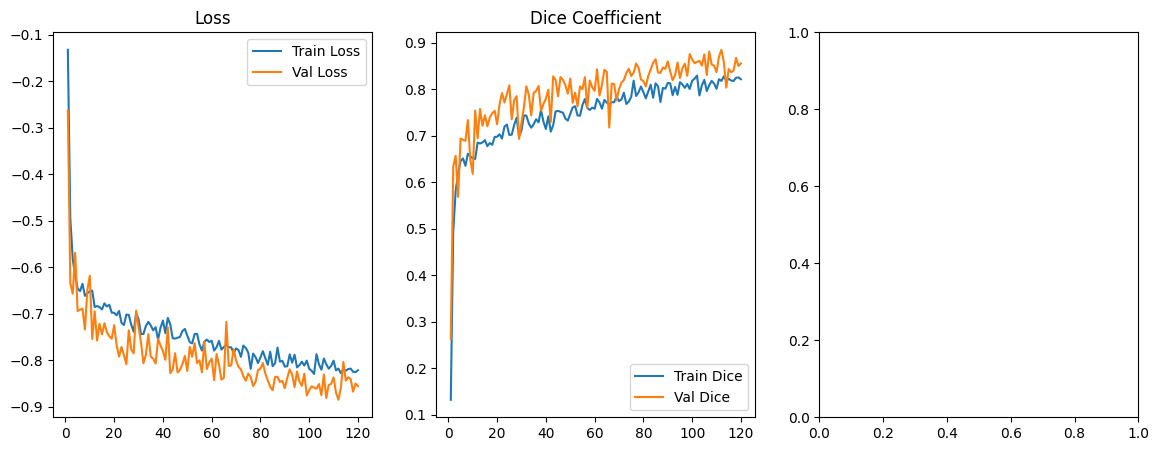

In [ ]:
history = {}


history['train_loss']= df.query("tag=='Loss/Train'").value
history['train_dice']= df.query("tag=='Dice/Train'").value
history['train_iou']= df.query("tag=='IoU/Train'").value
history['val_loss']=df.query("tag=='Loss/Val'").value
history['val_dice']=df.query("tag=='Dice/Val'").value
history['val_iou']=df.query("tag=='IoU/Val'").value

# Usage:
plot_history(history)

In [11]:
df.query("tag=='Iou/Train'")

,step,tag,value
